In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
 df = pd.read_csv('height-weight.csv')
 df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [85]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

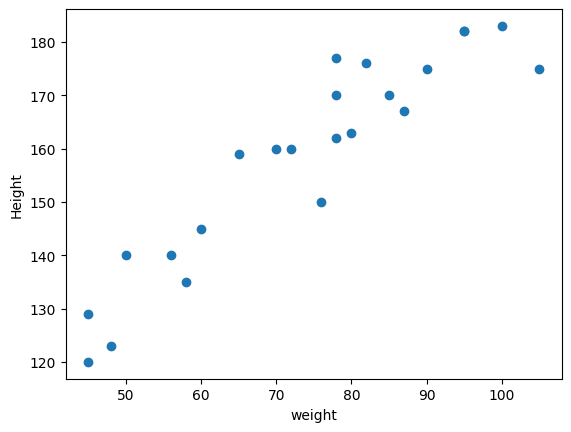

In [86]:
plt.scatter(df.Weight,df.Height)
plt.xlabel("weight")
plt.ylabel("Height")

# problem statement :- I want to predict height based on weight

In [87]:
# divide the data into the x and y
x = df[['Weight']]
y = df['Height']

In [88]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [89]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


read the data

EDA

Data preparation

x&y

train  the split (scalling)

model training

model evaluation

In [90]:
# traning and testing the data
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state  =  1)


In [92]:
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [93]:
x_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [94]:
y_train

,Height
10,176
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177


In [95]:
y_test

,Height
20,129
17,159
3,145
13,183
19,167
16,140


## scalling
 standerdization use for the ml
 but the fit means to learn the H and sigma


 standerdization>>>> fit_transform on train data and transform on test data
 If you use fit on test data,(that is wrong) y0u leakage,
 # avoid it
 most of the ml model standardScaler is used as it deals with normal distribution

In [96]:
from sklearn.preprocessing import StandardScaler


In [97]:
scaler = StandardScaler()
scaler

StandardScaler()

In [98]:
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [99]:
#scaling should be done always after train test split
# target variable should not be scaled
#avoid scaling categorical features
x_train = scaler.fit_transform(x_train)    # for train data use fit_transform
x_test = scaler.transform(x_test)         # for test data use transform only

In [100]:
x_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

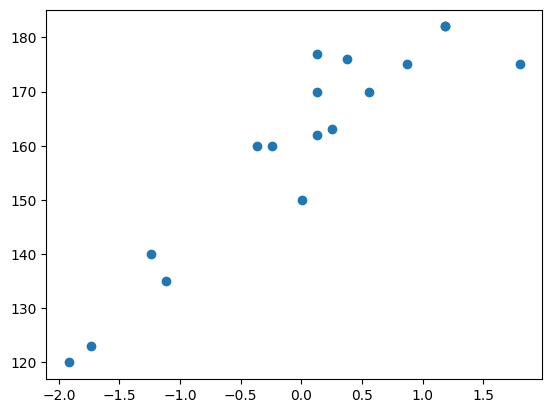

In [101]:
plt.scatter(x_train,y_train)

model traning

In [102]:
 from sklearn.linear_model import LinearRegression
 #Linear rergression parameters
 #  fit_intercept >> The best fit line will have intercept, by default it is true
 # copy_x >> copy the original x_train and build the model, it will not modify the original data
# n_jobs >> -1 means using all processors.
# positive >> when set to true , forces the coefficients to be positive.\


# fit >> train the model
#predict >>  test the model

#after building the model, you have attributes of the model
# coef_
# intercept_


In [103]:
regressor= LinearRegression()
regressor


LinearRegression()

In [104]:
regressor.fit(x_train,y_train)

LinearRegression()

In [105]:
regressor.coef_    # the coefficient of the x

array([17.7307072])

In [106]:
regressor.intercept_   # intercept of the line

np.float64(160.0)

In [107]:
print("The slop or coeff of model is ", regressor.coef_)
print("The intercept of model is ", regressor.intercept_)

The slop or coeff of model is  [17.7307072]
The intercept of model is  160.0


# predict on train data

interpretation of the coef >> one unit increase in weight on an average the height increase by 17.7307072 unit


predicted height(y) on x_train = 160 + 17.7307072 * (x_train)


predicted height(y) on x_test = 160 + 17.7307072 * (x_test)

In [108]:
regressor.predict(x_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

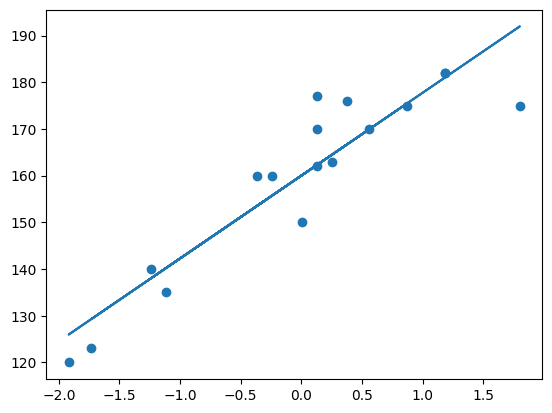

In [109]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train))

In [110]:
regressor.predict(x_test)

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

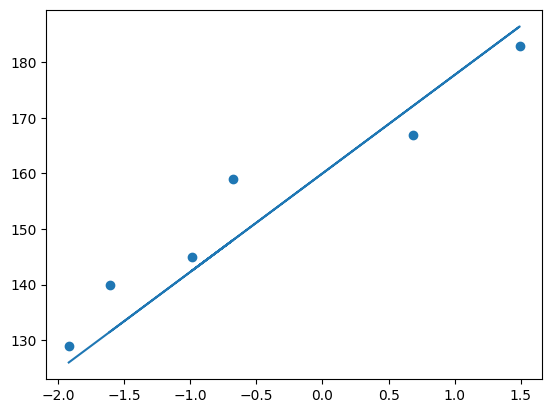

In [111]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test))

In [112]:
y_pred_test = regressor.predict(x_test)

In [113]:
y_pred_test

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

In [114]:
_#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [115]:
mean_absolute_error(y_test,y_pred_test)

5.608571289304838

In [116]:
mean_squared_error(y_test,y_pred_test)

41.285662830455514

In [117]:
rsq = r2_score(y_test,y_pred_test)   # r2 = ssr/ sst

In [118]:
rsq

0.8721036174256606

adjusted r2  = 1-([1-r2]*(n-1)/(n-k-1))

n is no of observation and k is no of predictor variables



In [119]:
x_test.shape

(6, 1)

In [120]:
1-(1-rsq)*(len(y_test) -1)/(len(y_test)-x_test.shape[1]-1)
# adjusted r2 is always lesser than the r2

0.8401295217820757

# assumption

X-y should have linear relationship

Observation should have no relation

error should have constant variation

error should be normally distributed

features among themself should be least **related**

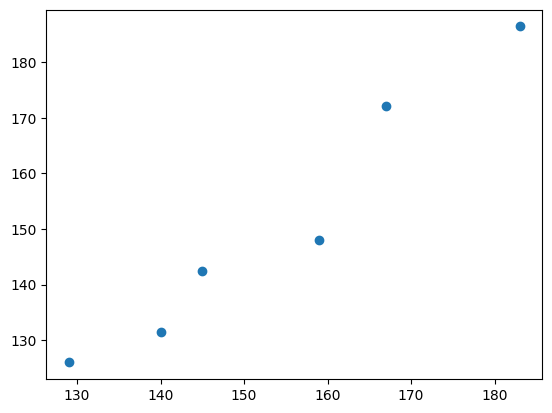

In [121]:
plt.scatter(y_test,y_pred_test)

error should have constant variation

error should be normally distributed

In [122]:
error = y_test - y_pred_test
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


/tmp/ipython-input-464779861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Height', ylabel='Density'>

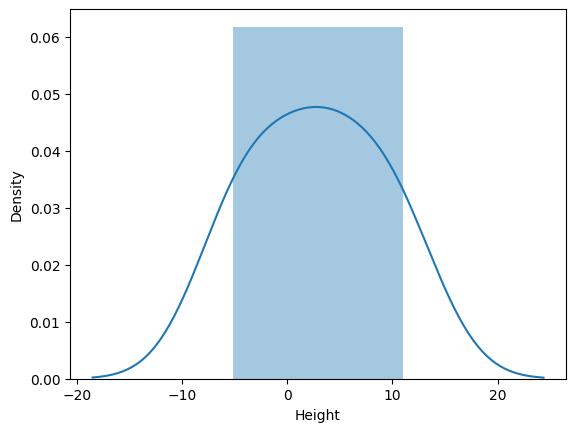

In [123]:
import seaborn as sns
sns.distplot(error)

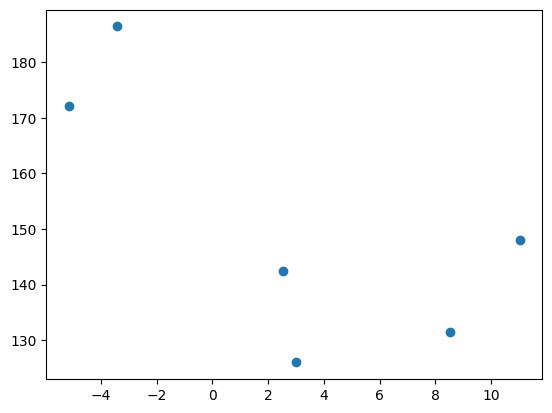

In [124]:
# to check constant variance
plt.scatter(error,y_pred_test)